# Machine Learning

In [1]:
from skimage.color import rgb2gray
import numpy as np 
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline
from scipy import ndimage

(155, 512, 3)


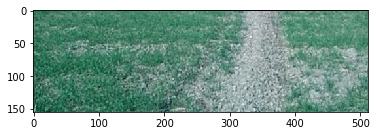

In [34]:
image  = plt.imread("Images/a.jpeg")
print(image.shape)
plt.imshow(image)

(155, 512)


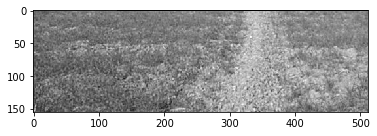

In [120]:
gray  = rgb2gray(image)
print(gray.shape)
plt.imshow(gray,cmap = "gray")



 Region-based segmentation
 - we use some threshold to distinguise the different parts of the images

In [13]:
gray_r  = gray.reshape(gray.shape[0] * gray.shape[1])
print(gray_r.shape)
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 2
    if gray_r[i] > 0.5:
        gray_r[i]  = 1
    else:
        gray_r[i] = 0


(79360,)


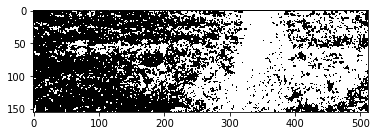

In [14]:
gray = gray_r.reshape(gray.shape[0] , gray.shape[1])
plt.imshow(gray,cmap = 'gray')
 

- Edge detection based segmeantaion

C:\Users\ANISH JAIN\Downloads


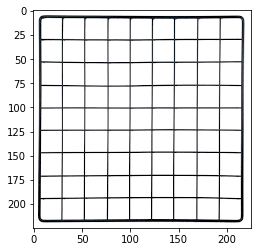

In [21]:
import os
base_path = r"C:\Users\ANISH JAIN\Downloads"
image = plt.imread(os.path.join(base_path,"index.png"))
plt.imshow(image)
print(base_path)

In [28]:
gray = rgb2gray(image)
print(image.shape)
sobel_horizontal = np.array([np.array([1,2,1]),np.array([0,0,0]),
                            np.array([-1,-2,-1])])
print(sobel_horizontal,'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), 
                           np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

(225, 225, 3)
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [25]:
out_h = ndimage.convolve(gray,sobel_horizontal,mode ="reflect")
out_v = ndimage.convolve(gray,sobel_vertical,mode ="reflect")

(225, 225)


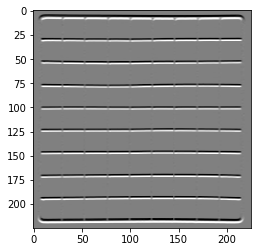

In [31]:
#Horizontal Image
print(out_h.shape)
plt.imshow(out_h,cmap = "gray")

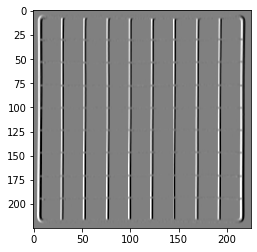

In [32]:
#Vertical Image

plt.imshow(out_v, cmap='gray')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


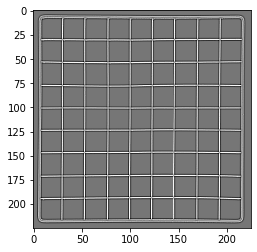

In [33]:
#To detect both horizontal and vertical edges 
kernel_laplace = np.array([np.array([1, 1, 1]), 
                           np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

out_hv = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_hv, cmap='gray')


# How K-means clustering works
- 1) First, randomly select k initial clusters 
- 2)  Randomly assign each data point to any one of the k clusters
- 3) Calculate the centers of these clusters
- 4) Calculate the distance of all the points from the  center of these cluster
- 5) Depending on the distance, the points are reassigned to the nearest cluster 
- 6) Calculate the center of the newly formed clusters
- 7) Finally, repeat steps step 4,5,6 util either the center of clusters dose not change or we reach the set nubers of iterations


(4320, 7680, 3)


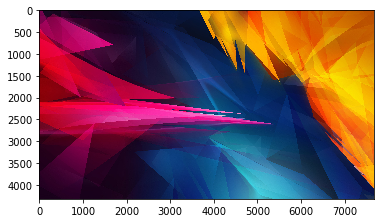

In [105]:
pic = plt.imread(os.path.join(base_path,'mkbhd.jpg'))/255.
print(pic.shape)
plt.imshow(pic)

In [111]:
pic2 = cv2.imread(os.path.join(base_path,'mkbhd.jpg')) / 255
pic3 = cv2.resize(pic2,(256,256))

In [112]:
pic3.shape

(256, 256, 3)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192*263, 3)

In [113]:
pic_n =  pic3.reshape(pic3.shape[0]*pic3.shape[1],pic3.shape[2])
pic_n.shape

(65536, 3)

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10 , random_state = 0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

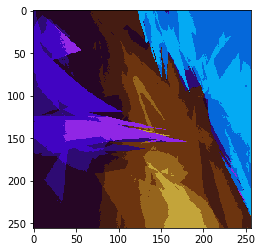

In [118]:
cluster_pic = pic2show.reshape(pic3.shape[0], pic3.shape[1],
                              pic3.shape[2])

plt.imshow(cluster_pic)

- k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).


- It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement. And since k-means is a distance-based algorithm, it is only applicable to convex datasets and is not suitable for clustering non-convex clusters.

# Mask  R-CNN

mask R-CNN is based on Faster R-CNN
So, Lets understand Faster R-CNN
- Faster R-CNN first uses a ConvNet to extract features maps from the images 
- These features maps are the passed through a "Region Proposal Network (RPN) which returs the candinate bounding box
- We then apply an RoI pooling layer on these candinate bounding box to bring all the candinates to same size
- And finally,the proposal are passed to a fully connected layer to classifiy and output the bounding boxex for objects 



In [124]:
import torch
print(torch.cuda.is_available())

False


In [125]:
!nvidia-smi

Mon Oct 05 12:48:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.81       Driver Version: 430.81       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX110      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8    N/A /  N/A |     37MiB /  2048MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Backbone Model

Similar to the ConvNet that we use in Faster R-CNN to extract feature maps from the image, we use the ResNet 101 architecture to extract features from the images in Mask R-CNN. So, the first step is to take an image and extract features using the ResNet 101 architecture. These features act as an input for the next layer.

# Region Proposal Network (RPN)

Now, we take the feature maps obtained in the previous step and apply a region proposal network (RPM). This basically predicts if an object is present in that region (or not). In this step, we get those regions or feature maps which the model predicts contain some object.

# Region of Interest (RoI)

The regions obtained from the RPN might be of different shapes, right? Hence, we apply a pooling layer and convert all the regions to the same shape. Next, these regions are passed through a fully connected network so that the class label and bounding boxes are predicted.
- (IOU -  Intersection over Union )
- IoU = Area of the intersection / Area of the union 
- Iou is calculated to reduce the computation time 
- let's say os if IOU is greater then 0.5 those is only consider for the next layer else would be neglected.

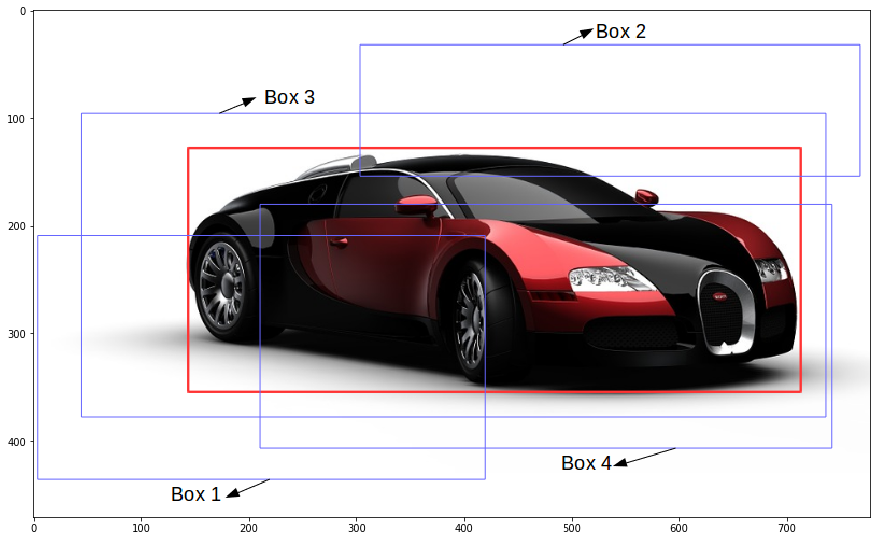

In [143]:
bug  = plt.imread(os.path.join(base_path,"bugati.webp"))
plt.figure(figsize = (15,10))
plt.imshow(bug)

Here, the IoU of Box 1 and Box 2 is possibly less than 0.5, whereas the IoU of Box 3 and Box 4 is approximately greater than 0.5. Hence. we can say that Box 3 and Box 4 are the region of interest for this particular image whereas Box 1 and Box 2 will be neglected.

Next, let’s see the final step of Mask R-CNN.

- Some how we have to figure out mask R-CNN for our specific data
- it requies the knowleadge of deep learning